In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

In [2]:
import os
datapath = os.environ.get("DATASETS")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Input, Flatten, GlobalMaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [5]:
directory = f"{datapath}/vegetables/Vegetable-Images/train"
train_set, val_set = image_dataset_from_directory(
    directory=directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    subset='both',
    seed=42,
)

Found 15000 files belonging to 15 classes.
Using 12000 files for training.
Using 3000 files for validation.


In [6]:
def rescale(img, label):
    return img/255.0, label

train_set_scaled = train_set.map(rescale)
val_set_scaled = val_set.map(rescale)

<h3 style="color:red"> DO NOT RUN BELOW CELL </h3>

In [ ]:
X = np.empty(shape=(0, 224, 224, 3))
y = np.empty(shape=(0, 15))

for x, y in val_set_scaled:
    X = np.concatenate(
        (X, x.numpy()[np.newaxis, ...]),
        axis=0,
    )
    y = np.concatenate(
        (y, y.numpy()),
        axis=0,
    )

<h3 style="color:red"> DO NOT RUN ABOVE CELL </h3>

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [8]:
model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

1/1 [==============================] - 0s 156ms/step
[('n01930112', 'nematode', 0.13931489), ('n03041632', 'cleaver', 0.041806106), ('n03838899', 'oboe', 0.039541423)]
1/1 [==============================] - 0s 125ms/step
[('n01930112', 'nematode', 0.12957123), ('n03041632', 'cleaver', 0.035649274), ('n03838899', 'oboe', 0.030744022)]
1/1 [==============================] - 0s 129ms/step
[('n01930112', 'nematode', 0.1474076), ('n03041632', 'cleaver', 0.030647703), ('n03838899', 'oboe', 0.028019195)]
1/1 [==============================] - 0s 142ms/step
[('n01930112', 'nematode', 0.13465771), ('n03041632', 'cleaver', 0.030210301), ('n03838899', 'oboe', 0.027009012)]
1/1 [==============================] - 0s 157ms/step
[('n01930112', 'nematode', 0.14875625), ('n03838899', 'oboe', 0.033854377), ('n03041632', 'cleaver', 0.03237485)]
1/1 [==============================] - 0s 112ms/step
[('n01930112', 'nematode', 0.14501919), ('n03041632', 'cleaver', 0.032037064), ('n03838899', 'oboe', 0.030095

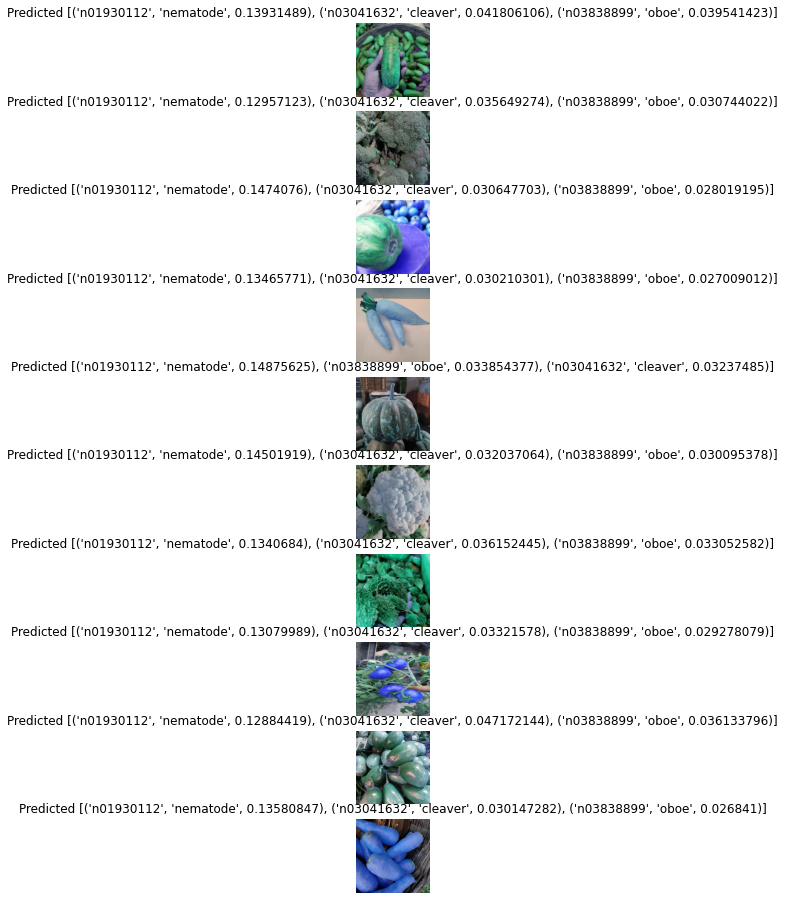

In [10]:
val_data = val_set_scaled.as_numpy_iterator()

fig=plt.figure(figsize=(16,16))

for i in range(10):
    
    img, label = next(val_data)
    img2 = img[0]
    x = img2[np.newaxis, ...]

    preds = model.predict(x)
    predictions = decode_predictions(preds, top=3)[0]
    print(predictions)

    sub = fig.add_subplot(10, 1, i+1)
    sub.set_title(f'Predicted {str(predictions)}')
    plt.axis('off')
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

plt.show()

### Top N accuracy aka Rank N accuracy

Rank N accuracy considers top N classes with highest probabilities.